
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E04_logistic_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Logistic regression exercises 

---
These are introductory exercises in Machine learning with focus in **logistic regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

iris = load_iris()

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

&nbsp; b) Now insert the data into a DataFrame. 

&nbsp; c) Do some EDA to get an understanding of the dataset. 

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

<details>

<summary>Hint</summary>

a) For DESCR key you need to print it.

f) Dataframes has a quantile method.  

</details>

<details>

<summary>Answer</summary>

b) 

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   species | specie_name   |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|----------:|:--------------|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |         0 | setosa        |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |         0 | setosa        |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |         0 | setosa        |
|  3 |                 4.6 |                3.1 |                 1.5 |                0.2 |         0 | setosa        |
|  4 |                 5   |                3.6 |                 1.4 |                0.2 |         0 | setosa        |

c) When you do describe, remove species as its statistical values are meaningless. 

|                   |    mean |      std |   min |   25% |   50% |   75% |   max |
|:------------------|--------:|---------:|------:|------:|------:|------:|------:|
| sepal length (cm) | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| sepal width (cm)  | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| petal length (cm) | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| petal width (cm)  | 1.19933 | 0.762238 |   0.1 |   0.3 |  1.3  |   1.8 |   2.5 |


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [2]:
# a & b)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.head())
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['species_num'] = iris.target
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_name,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


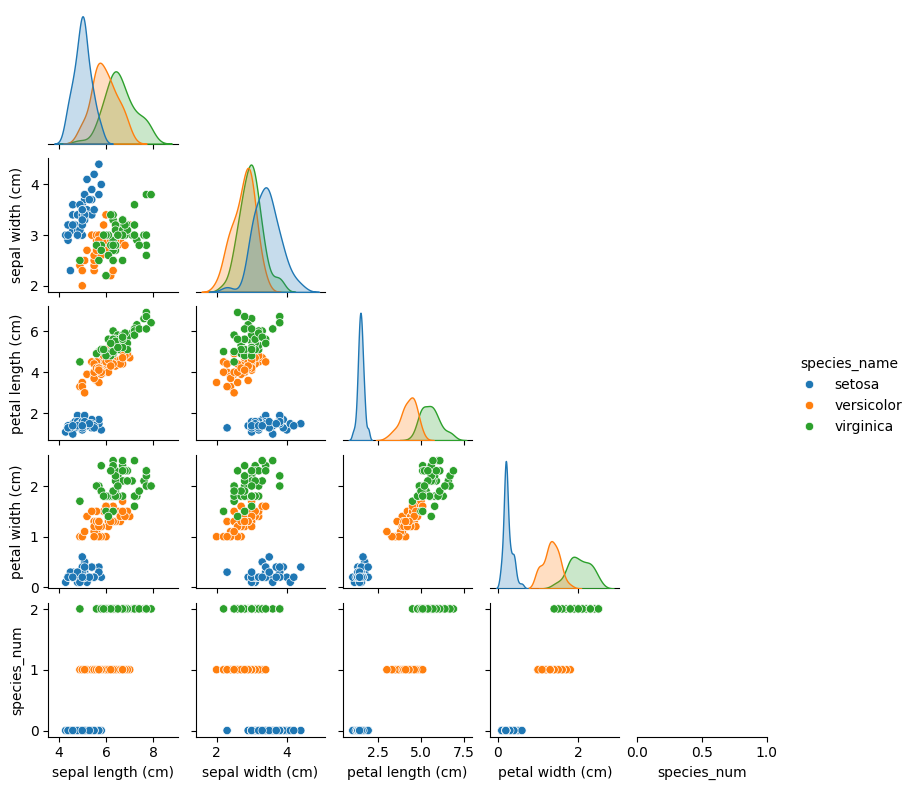

In [3]:
# c)
sns.pairplot(df, corner=True, height=1.6, hue='species_name')
# sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='species_name')
# df.describe()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species_name       150 non-null    category
 5   species_num        150 non-null    int32   
dtypes: category(1), float64(4), int32(1)
memory usage: 5.7 KB


<Axes: >

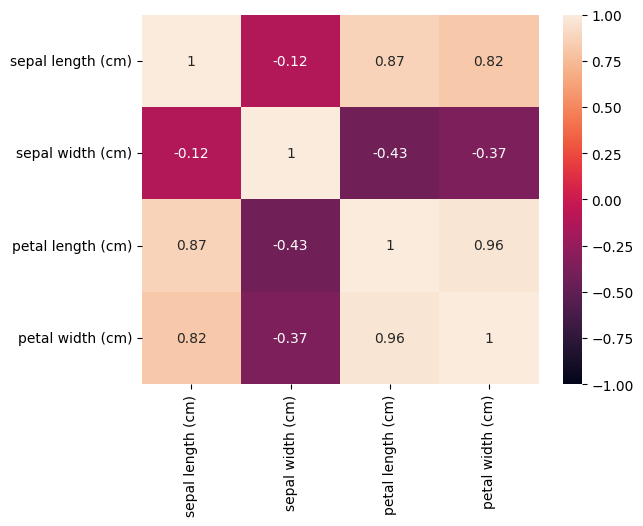

In [5]:
# d)
df_num  = df.copy().drop(columns=['species_name', 'species_num'])
sns.heatmap(df_num.corr(), annot=True, vmin=-1, vmax=1)

<Axes: xlabel='species_name', ylabel='petal width (cm)'>

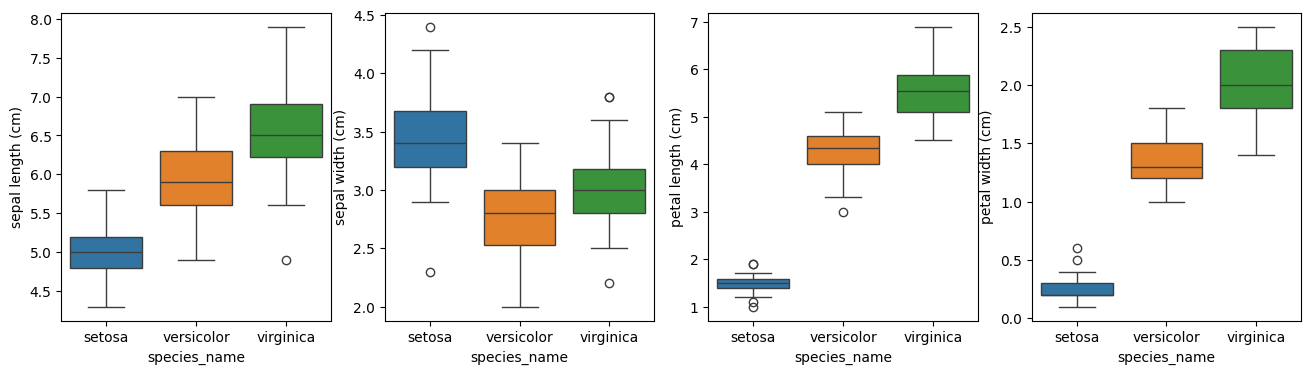

In [6]:
# e)
ax, fig = plt.subplots(1, 4, figsize=(16, 4))
sns.boxplot(data=df, x='species_name', y='sepal length (cm)', ax=fig[0], hue='species_name')
sns.boxplot(data=df, x='species_name', y='sepal width (cm)', ax=fig[1], hue='species_name')
sns.boxplot(data=df, x='species_name', y='petal length (cm)', ax=fig[2], hue='species_name')
sns.boxplot(data=df, x='species_name', y='petal width (cm)', ax=fig[3], hue='species_name')

In [7]:
# # f) hjälp taget från stackoverflow

cols = ['sepal width (cm)', 'sepal length (cm)', 'petal width (cm)', 'petal length (cm)'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
df.describe()
# df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_num
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.040411,3.806849,1.220548,1.020548
std,0.834093,0.397853,1.758042,0.759393,0.817643
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [9]:
df['species_name'].value_counts()

species_name
virginica     50
versicolor    49
setosa        47
Name: count, dtype: int64

## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 

---

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop(columns=['species_name', 'species_num']), df['species_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.mean():.2f}, {scaled_X_test.mean():.2f}, {y_train.mean():.2f}, {y_test.mean():.2f}")
print(f"{scaled_X_train.std():.2f}, {scaled_X_test.std():.2f}, {y_train.std():.2f}, {y_test.std():.2f}")

0.00, -0.03, 1.03, 1.00
1.00, 1.00, 0.78, 0.89


## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

<details>

<summary>Answer</summary>

weights: 

```py
array([[-1.33033256,  1.35076961, -2.26169407, -2.07715072],
       [ 0.40073538, -0.28598722, -0.58388865, -0.7782766 ],
       [ 0.67977172, -0.81485664,  3.09503329,  3.10542664]])
```

$\ell_1$-ratio:

```py
array([0.2, 0.2, 0.2])
```


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')
model.fit(scaled_X_train, y_train)

print(model.score(scaled_X_train, y_train), model.coef_, model.intercept_)

0.9587628865979382 [[-0.75724147  1.01721885 -1.86219972 -1.61026738]
 [ 0.03374982  0.          0.         -0.25135366]
 [ 0.         -0.45465636  2.59974753  2.85122619]] [-0.55505443  2.10196541 -1.54691098]


## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report 

<details>

<summary>Answer</summary>


b) 

<img src = "../assets/confusion_matrix_iris.png" height=300>



c) 

Classification report 

```py
          precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46
```






</details>

---

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.91      0.95        11
   virginica       0.95      1.00      0.97        19

    accuracy                           0.98        49
   macro avg       0.98      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49



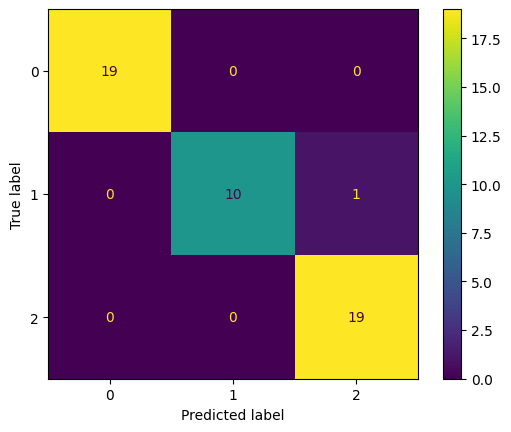

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# a)
y_pred = model.predict(scaled_X_test)

# b)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# c)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score}$, i.e. average score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overall accuracy. Do the cross-validation manually using for statement. 

In [27]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

k = 5
scores = cross_val_score(model, scaled_X_train, y_train, cv=k)

print("Cross-validation scores:", scores)


Cross-validation scores: [0.95       0.95       1.         0.89473684 0.94736842]


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---